<a href="https://colab.research.google.com/github/eugene27091/Test/blob/main/%EC%A0%84%EC%B2%98%EB%A6%AC_%ED%86%A0%ED%81%B0%ED%99%94_%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install konlpy

     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 448 kB 56.4 MB/s 
     |████████████████████████████████| 86 kB 5.1 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


데이터 가져오기

In [ ]:
import pandas as pd
from konlpy.tag import Okt
import re

#리뷰 col을 리스트로 저장
df = pd.read_excel('/content/drive/MyDrive/[데청캠] NLP와 데이터/Coupang_all_nonull.xlsx의 사본.xlsx')

review = df['document']
review_list = review.values.tolist()
#print(review_list)




브랜드 초성 있는지 확인

*   있으면 -> 초성을 브랜드 명으로 
*   없으면 -> 자음 제거



In [ ]:
#브랜드 초성 한글로 바꾸기
#초성만 있는 word 찾아서 브랜드 초성 있는지 확인

#자음만 추출

#자음 = []
#for review_all in review_list :
#  자음.extend(re.compile('[|ㄱ-ㅎ]+').findall(review_all))

#df_11 = pd.DataFrame(data = list(zip(자음)), columns = ['초성'])
#df_11
#df_11.to_excel('/content/drive/MyDrive/[데청캠] NLP와 데이터/aaa.xlsx')

# 브랜드 초성 -> 브랜드명으로 치환


#------------------------------------------


In [ ]:

#리뷰 col 전처리 진행-------------------------------------------------------
#\n을 ' '로 바꾸기
df['document'] = df['document'].apply(lambda x : x.replace('\\n', ''))
#print(df)

#특수문자 제거
df["document"] = df["document"].str.replace(pat=r'[^\w]', repl=r' ', regex=True)
#print(df)


#맨 앞,뒤 공백 제거
df['document'] = df['document'].str.strip()
#print(df)



#자음만, 모음, 영어 지우기




#----------------------------------------------------------------------

#전처리 끝난 리뷰 col 리스트로 바꾸기
review = df['document']
review_list = review.values.tolist()


In [ ]:
#okt로 토큰화
okt = Okt()

# 토큰화 데이터프레임에 열추가
tokenize = []

for review in review_list :
 tokenize.append(okt.pos(review,norm=True, stem=True))

df = df.assign(token = tokenize)
#print(df)

#리뷰 문자열 길이 데이터프레임에 열 추가
review_len = []
for review in df['document'] :
  review_len.append(len(review))

df= df.assign(review_length = review_len)
#print(df)

# 리뷰길이가 5이하인것 삭제
len_5 = df[df['review_length'] <= 5].index
df = df.drop(len_5)
print(df)


#엑셀로 저장
#df.to_excel('/content/drive/MyDrive/[데청캠] NLP와 데이터/ccc.xlsx')



        Unnamed: 0  ...  review_length
0                0  ...           1396
1                1  ...            610
2                2  ...            976
3                3  ...            329
4                4  ...            784
...            ...  ...            ...
113043      113043  ...             27
113044      113044  ...             10
113047      113047  ...             48
113048      113048  ...             10
113051      113051  ...            181

[106310 rows x 9 columns]


In [ ]:
#불용어를 리스트로 저장
stop_words = "먹다 사료 하다 좋다 자다 먹이다 있다 강아지 보다 같다 너무 것 구매 우리 이다 않다 없다 되다 바꾸다 주다 아이 거 다 집 주문 제품 이 좋아하다 들다 더 시키다 많이 좀 때 되어 다 계속 애 사다 항상 아주 많다 넘다 애기 살 아니다 오다 밥 그렇다 간식 다른 마리 괜찮다 받다 구입 강쥐 저희 개 정말 나다 안 또 상품 엄청 생각 감사하다 알 늘 키우다 정도 맞다 전 조금 푸다 모르다 만족하다 이번 가다 요 없이 추천 다시 울 진짜 보고 한번 개월 근데 아가 믿다 원래 일단 알다 그래서 늘다 아직 댕댕 말티즈 굿 그냥 지금 개별 먹기 그래도 최고 심하다 번 나오다 싶다 저 해 꾸준하다 때문 건강하다 달 응 안나 들이다 바로 매번 떨어지다 앞 제 다르다 걸 로켓 역시 분 짧다 중 대비 하나 해주다 이제 버리다 용 안되다 돼다 찾다 수 잇다 완전 후 뜯다 해보다 맘 뭐 좋아지다 자주 안좋다 듯 제일 만족 다음 급하다 별로 살다 적당하다 적다 고민 문제 거의 보내다 애가 두번째 습 다행 기한 견 말 두다 사람 생기다 아기 먹어주다 마음 도 확실하다 왜 나 워낙 같이 사서 말다 지다 차다 탈 건지다 요즘 이렇게 구 이상 착하다 거부 빠지다 해봤다 평 쓰다 날 나서다 여기 만들다 보이다 비다 먹음 느낌 덜 기분 첨 커서 끄다 무엇 줄다 그 사보다 편 아쉽다 딱 힘들다 데 터지다 그릇 파다 드리다 들어가다 오늘 달라 조금씩 나쁘다 가리다 멍멍 대형견 정착 년 사진 곳 소형견 시작 재 넣다 야하다 빨리 매우 도움 시츄 노령 어떻다 혹시 없어지다 정기 녀석 성도 부담 젠 선택 약간 오래 예전 자마자 끼 내다 고양이 쭉 이용 판매 종류 자꾸 이쁘다 반려견 가끔 벌써 함 잘쓰다 포메 여 애견 불다 새롭다 일 덥다 써다 아침 빼다 배고프다 오르다 사용 통 배 감 평소 말티 위생 가장 모두 예정 못 살짝 서다 만 확인 요것 게 기다 별 금방 꼭 신경 이렇다 빨르다 참고 그나마 도착 가랑타다 훨씬 바 반 아프다 강추 감사 뒤 시간 남기다 리뷰 덜다 놓다 젤 올리다 가도 갑자기 햇 덜하다 애용 쥐다 다만 따로 은 넉넉하다 주 품절 환장하다 지켜보다 위해 걸리다 바뀌다 땐 신선하다 우선 짱 몸 값 예민하다 사주다 이유 밥그릇 장 작 다행하다 질리다 자율 동안 거나 팩 좀더 이상하다 높다 전혀 임 뱉다 냥 보 담다 비교 관리 예쁘다 뚝딱 봉 손 적 로 개다 가보다 무난 대다 거만 독 탐사 기준 계기 성 나가다 예 키로 원대하다 맛있다 만나다 되어다 아무리 거들다 감흥 처음 날리다 크다 공기 비우다 "
stop_words = stop_words.split(' ')
#stop_words

#result = []
#for w in token_nva:
#    if w not in stop_words:
#        result.append(w)
#result
#counts_result = Counter(result).most_common()
#counts_result

In [ ]:
# 명사, 동사, 형용사, 부사만 추출해서 token_nva에 담기
token_nva = []
for word_tag in tokenize:
  for word, tag in word_tag:
    if tag in ['Noun','Verb','Adjective','Adverb'] and word not in stop_words:
      token_nva.append(word)

#명사 : token_n, 동사 : token_v, 형용사 : token_a 출력해서 각 리스트에 담기
token_n = []
for word_tag in tokenize:
  for word, tag in word_tag:
    if tag in ['Noun'] and word not in stop_words :
      token_n.append(word)

token_v = []
for word_tag in tokenize:
  for word, tag in word_tag:
    if tag in ['Verb'] and word not in stop_words :
      token_v.append(word)

token_a = []
for word_tag in tokenize:
  for word, tag in word_tag:
    if tag in ['Adjective'] and word not in stop_words :
      token_a.append(word)

token_av = []
for word_tag in tokenize:
  for word, tag in word_tag:
    if tag in ['Adverb'] and word not in stop_words :
      token_av.append(word)

# 빈도수 확인하기
# 각 원소의 출현 횟수를 계산하는 Counter 모듈을 활용
from collections import Counter

counts_nva = Counter(token_nva).most_common()
counts_n = Counter(token_n).most_common()
counts_v = Counter(token_v).most_common()
counts_a = Counter(token_a).most_common()
counts_av = Counter(token_av).most_common()

dic = { 'token_noun' : counts_n, 'token_verb' : counts_v, 'token_adjective' : counts_a, 'token_adverb' : counts_av, 'token_nva' : counts_nva }
df_22 = pd.DataFrame.from_dict(dic, orient='index')
df_22 = df_22.transpose()
#print(df_22)

#엑셀에 저장
df_22.to_excel('/content/drive/MyDrive/[데청캠] NLP와 데이터/bbb.xlsx')





워드클라우드 생성

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 148486 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
#워드클라우드 생성
from wordcloud import WordCloud
from PIL import Image
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()



NanumBarunGothic


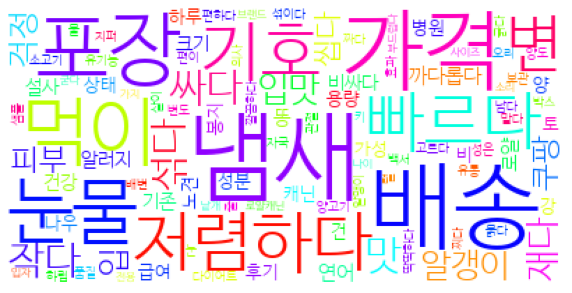

In [ ]:
#mask_image = np.array(Image.open('./drive/MyDrive/machine_learning_data/dolphine.jpg'))
wc = WordCloud(
    font_path=path, # 사용할 폰트
    background_color='white', # 배경색
    max_words=100, # 최대 빈도수를 기준으로 출력할 단어 수
    #mask=mask_image, # 마스크 이미지
    max_font_size=70, # 최대 폰트 크기
    colormap='hsv')


#빈도수 높은 순으로 정렬한 명형동부로 시각화
wc.generate_from_frequencies(dict(counts_nva))
fig=plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(wc)
plt.show()

fig.savefig('/content/drive/MyDrive/[데청캠] NLP와 데이터/coupang_without_stopwords.png')